In [2]:
import os
os.chdir(r'C:\Users\Pedram\Documents\GitHub\Forecast-Regression-AgeWeb')
print(os.getcwd())

C:\Users\Pedram\Documents\GitHub\Forecast-Regression-AgeWeb


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv', delimiter=';')

# Print the first five rows
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


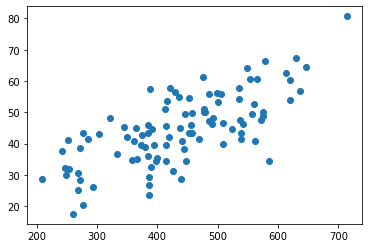

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a scatter plot of time vs age
plt.scatter(website.time_seconds, website.age)

# Show then clear plot
plt.show()
plt.clf()

Regression coefficients: Intercept    128.967945
age            6.913758
dtype: float64


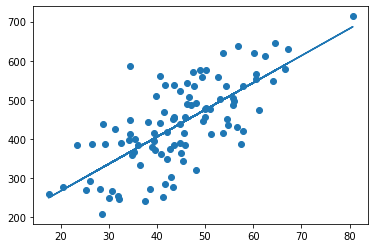

<Figure size 432x288 with 0 Axes>

In [28]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds~age', website)
results = model.fit()
print('Regression coefficients:', results.params)


# Plot the scatter plot with the line on top
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[0] + results.params[1]*website.age)

# Show then clear plot
plt.show()
plt.clf()

In [29]:
# Calculate fitted values
fitted_values = results.predict(website)

# Calculate residuals
residuals = website.time_seconds - fitted_values

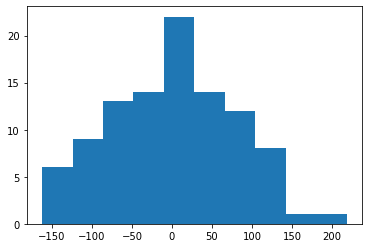

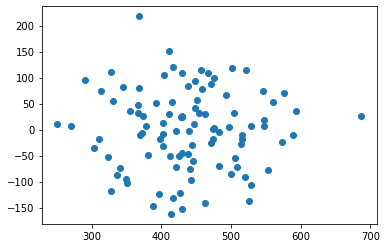

<Figure size 432x288 with 0 Axes>

In [30]:
# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)


# Show then clear the plot
plt.show()
plt.clf()

In [31]:
print(results.params[0], results.params[1])
print(results.params)

128.96794504809202 6.913757597108944
Intercept    128.967945
age            6.913758
dtype: float64


In [35]:
# Predict amount of time on website for a user with n=40 year old
n=40
pred40 = results.params[0] + results.params[1]*n
print('predicted time on website for a 40 year old user: ', round(pred40,1), 'seconds')

predicted time on website for a 40 year old user:  405.5 seconds


In [12]:

# Fit a linear regression to predict time_seconds based on browser
model = sm.OLS.from_formula('time_seconds ~ browser', website)
results = model.fit()
print(results.params)

# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64
Mean time (Chrome):  489.70425531914907
Mean time (Safari):  390.64716981132074
Mean time difference:  99.05708550782833
